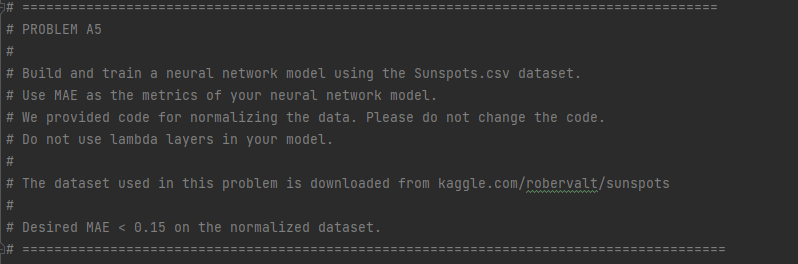

In [ ]:
import csv
import tensorflow as tf
import numpy as np
import urllib

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)


def solution_A5():
    data_url = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/sunspots.csv'
    urllib.request.urlretrieve(data_url, 'sunspots.csv')

    time_step = []
    sunspots = []

    with open('sunspots.csv') as csvfile:
      reader = csv.reader(csvfile, delimiter=',')
      next(reader)
      for row in reader:
        sunspots.append(float(row[2])))
        time_step.append(int(row[0]))

    series= np.array(sunspots) # YOUR CODE HERE

    # Normalization Function. DO NOT CHANGE THIS CODE
    min=np.min(series)
    max=np.max(series)
    series -= min
    series /= max
    time=np.array(time_step)

    # DO NOT CHANGE THIS CODE
    split_time=3000


    time_train=time[:split_time]  # YOUR CODE HERE
    x_train=series[:split_time]  # YOUR CODE HERE
    time_valid=time[split_time:]  # YOUR CODE HERE
    x_valid=series[split_time:]  # YOUR CODE HERE

    # DO NOT CHANGE THIS CODE
    window_size=30
    batch_size=32
    shuffle_buffer_size=1000


    train_set=windowed_dataset(x_train, window_size=window_size,
                               batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)


    model=tf.keras.models.Sequential([
      # YOUR CODE HERE.
      tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                               strides=1, padding="causal",
                               activation="relu",
                               input_shape=[None, 1]),
      tf.keras.layers.LSTM(60, return_sequences=True),
      tf.keras.layers.LSTM(60, return_sequences=True),
      tf.keras.layers.Dense(30, activation="relu"),
      tf.keras.layers.Dense(10, activation="relu"),
      tf.keras.layers.Dense(1)
    ])

    # YOUR CODE
    model.compile(loss='mae', optimizer='adam')
    model.fit(train_set, batch_size=256, epochs=100)
    return model

In [ ]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_A5()
    model.save("model_A5.h5")

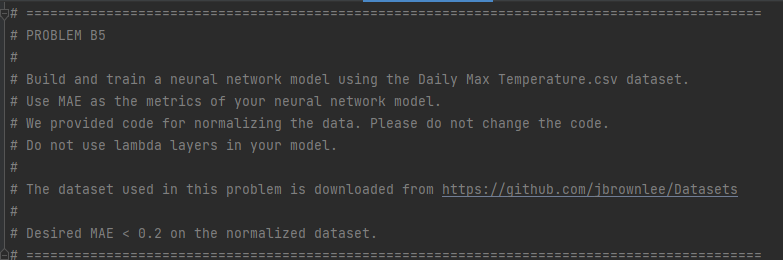

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
import urllib

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)


def solution_B5():
    data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-max-temperatures.csv'
    urllib.request.urlretrieve(data_url, 'daily-max-temperatures.csv')

    time_step = []
    temps = []

    with open('daily-max-temperatures.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        step = 0
        for row in reader:
            temps.append(float(row[1]))
            time_step.append(step)
            step=step + 1

    series=np.array(temps)# YOUR CODE HERE
    time = np.array(time_step)
    # Normalization Function. DO NOT CHANGE THIS CODE
    min=np.min(series)
    max=np.max(series)
    series -= min
    series /= max
    time=np.array(time_step)

    # DO NOT CHANGE THIS CODE
    split_time=2500

    time_train=time[:split_time]# YOUR CODE HERE
    x_train=series[:split_time]# YOUR CODE HERE
    time_valid=time[split_time:]# YOUR CODE HERE
    x_valid=series[split_time:]# YOUR CODE HERE

    # DO NOT CHANGE THIS CODE
    window_size=64
    batch_size=256
    shuffle_buffer_size=1000

    train_set=windowed_dataset(
        x_train, window_size, batch_size, shuffle_buffer_size)
    print(train_set)
    print(x_train.shape)

    model=tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                               strides=1, padding="causal",
                               activation="relu",
                               input_shape=[None, 1]),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        # YOUR CODE HERE.
        tf.keras.layers.Dense(1),
        tf.keras.layers.Lambda(lambda x: x * 400.0)
    ])
    # YOUR CODE HERE
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(
        lambda epoch: 1e-8 * 10 ** (epoch / 20))
    optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])
    history = model.fit(train_set, epochs=50, callbacks=[lr_schedule])

    return model

In [ ]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_B5()
    model.save("model_B5.h5")

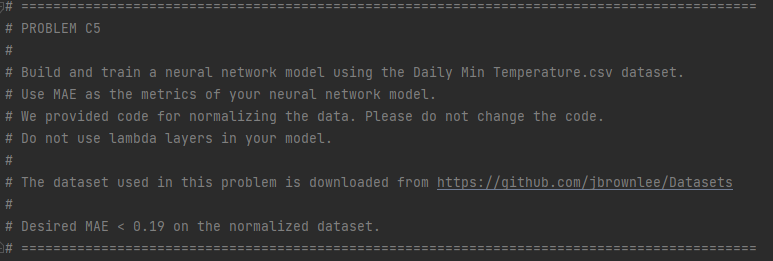

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
import urllib

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)


def solution_C5():
    data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
    urllib.request.urlretrieve(data_url, 'daily-min-temperatures.csv')

    time_step = []
    temps = []

    with open('daily-min-temperatures.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        step = 0
        for row in reader:
            temps.append(float(row[1]))
            time_step.append(str(row[0]) )
            step=step + 1

    series= np.array(temps)  # YOUR CODE HERE

    # Normalization Function. DO NOT CHANGE THIS CODE
    min=np.min(series)
    max=np.max(series)
    series -= min
    series /= max
    time=np.array(time_step)

    # DO NOT CHANGE THIS CODE
    split_time=2500

    time_train= time[:split_time] # YOUR CODE HERE
    x_train= series[:split_time] # YOUR CODE HERE
    time_valid= time[split_time:] # YOUR CODE HERE
    x_valid= series[split_time:] # YOUR CODE HERE

    # DO NOT CHANGE THIS CODE
    window_size=64
    batch_size=256
    shuffle_buffer_size=1000

    train_set=windowed_dataset(
        x_train, window_size, batch_size, shuffle_buffer_size)
    print(train_set)
    print(x_train.shape)

    model=tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                               strides=1, padding="causal",
                               activation="relu",
                               input_shape=[None, 1]),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        # YOUR CODE HERE.
        tf.keras.layers.Dense(1),
    ])
    model.compile(loss="mae", optimizer="adam", metrics=["MAE"])
    model.fit(train_set, batch_size=256, epochs=5)
    # YOUR CODE HERE
    return model

In [ ]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_C5()
    model.save("model_C5.h5")